In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

from sklearn.model_selection import train_test_split

In [ ]:
import Module.Loan_Modules as Loan_Modules

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv('processed_loan_data_v3.csv')

In [4]:
data.shape

(973534, 95)

# One-Hot Encoder

In [5]:
dummy_list = ['applicationtype', 'verificationstatus', 'homeownership', 'grade',
               'initialliststatus', 'purpose']

In [6]:
dummy_enconded = pd.get_dummies(data[dummy_list])

In [7]:
continuous_list = list(set(data.columns.tolist()) - set(dummy_list))

In [ ]:
# continuous_list = ['avgcurbal', 'dti', 'ficorangelow', 'ilutil', 'inqfi', 'installment', 'intrate', 'maxbalbc'
#                    , 'mosinoldilacct', 'mosinoldrevtlop', 'mthssincercntil', 'mthssincerecentbc'
#                    , 'mthssincerecentinq', 'numrevtlbalgt0', 'openacc6m', 'openactil', 'revolutil', 'totalrevhilim']

In [8]:
df_modeling = pd.concat([data[continuous_list], dummy_enconded], axis=1)

In [9]:
df_modeling.head()

,diff_crline_issue,openil12m,annualinc,numrevtlbalgt0,revolutil,Zip_Pop_mean,totalcutl,bcutil,numoprevtl,allutil,dti,numiltl,tothicredlim,zip_freq,inqfi,mthssincerecentinq,totalacc,ilutil,totalbalil,inqlast12m,ARM_APR,totalbclimit,19_Unemploy,bcopentobuy,totalilhighcreditlimit,openactil,addrstate,Zip_Median_min,mthssincelastdelinq,mosinoldilacct,openil24m,mthssincerecentbc,Zip_Pop_min,mosinrcnttl,inqlast6mths,maxbalbc,numacctsever120pd,openrv24m,accopenpast24mths,ficorangehigh,totcurbal,trainflag,installment,numactvrevtl,pubrec,ficorangelow,pubrecbankruptcies,pcttlnvrdlq,totcollamt,numactvbctl,mortacc,18_Unemploy,Zip_Median_max,loanstatus,percentbcgt75,openacc,delinqamnt,numbctl,emplength,totalbalexmort,term,mthssincercntil,15_fixed_APR,mosinrcntrevtlop,openacc6m,fundedamnt,revolbal,30_fixed_APR,mosinoldrevtlop,emptitle_chargeoff_pct,Zip_Mean_max,avgcurbal,numtloppast12m,intrate,totalrevhilim,Zip_Mean_mean,numrevaccts,Zip_Median_mean,Zip_Pop_max,Zip_Mean_min,numbcsats,delinq2yrs,Unnamed: 0,issued,openrv12m,mthssincerecentrevoldelinq,subgrade,loanamnt,numsats,applicationtype_Individual,applicationtype_Joint App,verificationstatus_Not Verified,verificationstatus_Verified,homeownership_ANY,homeownership_MORTGAGE,homeownership_NONE,homeownership_OWN,homeownership_RENT,grade_A,grade_B,grade_C,grade_D,grade_other,initialliststatus_f,initialliststatus_w,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_other,purpose_wedding
0,4960.0,1.0,58240.0,6.0,66.4,29381.333333,2.0,66.4,6.0,78.0,38.53,7.0,336009.0,25.33,4.0,7.0,18.0,88.0,34645.0,2.0,4.87,36700.0,4.3,12317.0,39309.0,2.0,CA,41960.0,8.0,163.0,3.0,10.0,456.0,7.0,0.0,13753.0,1.0,3.0,6.0,664.0,271606.0,1,542.07,6.0,0.0,660.0,0.0,88.9,0.0,5.0,1.0,4.0,91371.0,0.0,20.0,9.0,0.0,6.0,5.0,101680.0,36.0,7.0,3.91,10.0,0.0,15000.0,67035.0,4.39,157.0,18.277712,112700.0,30178.0,2.0,17.97,116700.0,81104.095238,10.0,66861.190476,76615.0,49482.0,5.0,1.0,0,2019-03-01,1.0,24.0,D1,15000.0,9.0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
1,4991.0,0.0,30000.0,4.0,43.7,36131.333333,1.0,97.6,6.0,72.0,11.88,7.0,26381.0,81.29,1.0,7.0,22.0,82.0,16136.0,1.0,4.87,2500.0,3.9,59.0,19781.0,3.0,GA,31087.0,27.0,164.0,1.0,9.0,342.0,7.0,0.0,1530.0,1.0,4.0,5.0,669.0,19021.0,1,108.14,4.0,0.0,665.0,0.0,90.9,0.0,2.0,3.0,3.4,113142.0,0.0,100.0,9.0,0.0,5.0,3.0,19021.0,36.0,16.0,3.91,7.0,0.0,3025.0,2885.0,4.39,149.0,27.031250,134286.0,2378.0,3.0,17.19,6600.0,77629.333333,12.0,64101.966667,80241.0,40660.0,2.0,0.0,1,2019-03-01,3.0,82.0,C5,3025.0,9.0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0
2,3468.0,1.0,53000.0,5.0,34.8,10388.137255,0.0,43.9,7.0,89.0,20.86,36.0,140588.0,20.31,1.0,5.0,44.0,113.0,109166.0,2.0,4.87,23800.0,3.8,13357.0,96588.0,15.0,TX,20289.0,31.0,114.0,1.0,20.0,18.0,5.0,1.0,5017.0,0.0,5.0,6.0,684.0,124465.0,1,70.71,5.0,0.0,680.0,0.0,100.0,0.0,3.0,0.0,3.5,108193.0,0.0,50.0,22.0,0.0,4.0,3.0,124465.0,36.0,8.0,3.91,5.0,1.0,2000.0,15299.0,4.39,43.0,18.814192,125882.0,5658.0,2.0,16.40,44000.0,56843.941176,8.0,50318.529412,44314.0,0.0,4.0,0.0,2,2019-03-01,1.0,32.0,C4,2000.0,22.0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0
3,15826.0,1.0,144000.0,10.0,74.4,35312.722222,0.0,77.3,16.0,76.0,25.48,14.0,326958.0,56.86,1.0,1.0,40.0,80.0,66285.0,2.0,4.87,76000.0,4.3,17275.0,106758.0,3.0,CA,24432.0,24.0,171.0,2.0,1.0,550.0,1.0,1.0,19786.0,0.0,2.0,4.0,694.0,230990.0,1,437.60,10.0,0.0,690.0,0.0,94.7,0.0,6.0,1.0,4.0,165764.0,1.0,75.0,20.0,0.0,12.0,1.0,128960.0,60.0,2.0,3.91,1.0,2.0,18500.0,62675.0,4.39,520.0,28.029171,198977.0,12833.0,3.0,14.74,84200.0,84724.138889,25.0,73459.055556,75611.0,0.0,8.0,0.0,3,2019-03-01,2.0,32.0,C2,18500.0,20.0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0
4,4352.0,0.0,42000.0,4.0,68.8,62714.333333,0.0,68.8,4.0,69.0,6.46,0.0,2500.0,123.65,0.0,5.0,8.0,73.0,0.0,0.0,4.87,2500.0,4.1,781.0,0.0,0.0,NY,24882.0,21.0,129.0,0.0,27.0,3040.0,27.0,0.0,618.0,0.0,0.0,0.0,669.0,1719.0,1,185.82,4.0,0.0,665.0,0.0,50.0,0.0,4.0,0.0,4.0,92175.0,0.0,25.0,4.0,0.0,7.0,1.0,1719.0,

In [10]:
df_modeling.drop(columns=['addrstate', 'subgrade'], inplace = True)

# Split into in-time training set and out-of-time testing set

In [11]:
issued=list(df_modeling['issued'].unique())

## Training set: < 2019-01-01 

In [12]:
df_train = df_modeling.loc[(df_modeling['trainflag']== 1) & (df_modeling['issued'] < '2019-01-01'), :]
df_train.shape

(914318, 109)

In [13]:
df_train.head()

,diff_crline_issue,openil12m,annualinc,numrevtlbalgt0,revolutil,Zip_Pop_mean,totalcutl,bcutil,numoprevtl,allutil,dti,numiltl,tothicredlim,zip_freq,inqfi,mthssincerecentinq,totalacc,ilutil,totalbalil,inqlast12m,ARM_APR,totalbclimit,19_Unemploy,bcopentobuy,totalilhighcreditlimit,openactil,Zip_Median_min,mthssincelastdelinq,mosinoldilacct,openil24m,mthssincerecentbc,Zip_Pop_min,mosinrcnttl,inqlast6mths,maxbalbc,numacctsever120pd,openrv24m,accopenpast24mths,ficorangehigh,totcurbal,trainflag,installment,numactvrevtl,pubrec,ficorangelow,pubrecbankruptcies,pcttlnvrdlq,totcollamt,numactvbctl,mortacc,18_Unemploy,Zip_Median_max,loanstatus,percentbcgt75,openacc,delinqamnt,numbctl,emplength,totalbalexmort,term,mthssincercntil,15_fixed_APR,mosinrcntrevtlop,openacc6m,fundedamnt,revolbal,30_fixed_APR,mosinoldrevtlop,emptitle_chargeoff_pct,Zip_Mean_max,avgcurbal,numtloppast12m,intrate,totalrevhilim,Zip_Mean_mean,numrevaccts,Zip_Median_mean,Zip_Pop_max,Zip_Mean_min,numbcsats,delinq2yrs,Unnamed: 0,issued,openrv12m,mthssincerecentrevoldelinq,loanamnt,numsats,applicationtype_Individual,applicationtype_Joint App,verificationstatus_Not Verified,verificationstatus_Verified,homeownership_ANY,homeownership_MORTGAGE,homeownership_NONE,homeownership_OWN,homeownership_RENT,grade_A,grade_B,grade_C,grade_D,grade_other,initialliststatus_f,initialliststatus_w,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_other,purpose_wedding
59183,4656.0,1.0,128000.0,4.0,62.6,21713.137931,0.0,62.6,5.0,106.0,14.12,23.0,326745.0,31.83,4.0,0.0,32.0,113.0,114956.0,2.0,NaN,17800.0,4.0,6650.0,101375.0,6.0,24984.0,19.0,153.0,2.0,2.0,832.0,1.0,0.0,6651.0,5.0,1.0,4.0,664.0,329317.0,1,552.23,4.0,0.0,660.0,0.0,70.0,358.0,4.0,3.0,3.9,148850.0,0.0,40.0,12.0,0.0,6.0,1.0,126106.0,36.0,1.0,NaN,2.0,2.0,14100.0,11150.0,NaN,138.0,13.717085,246234.0,27443.0,3.0,23.87,17800.0,81784.655172,6.0,62507.103448,46232.0,31253.0,5.0,1.0,59183,2018-03-01,1.0,33.0,14100.0,12.0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0
59184,5630.0,1.0,92000.0,4.0,46.2,20896.000000,0.0,91.3,11.0,55.0,11.40,13.0,55700.0,6.75,1.0,7.0,36.0,86.0,10272.0,1.0,NaN,22100.0,4.1,1924.0,12000.0,1.0,35645.0,31.0,185.0,1.0,3.0,4206.0,3.0,0.0,9510.0,0.0,4.0,5.0,694.0,30448.0,1,466.10,4.0,0.0,690.0,0.0,100.0,0.0,4.0,0.0,4.0,82291.0,1.0,100.0,12.0,0.0,11.0,10.0,30448.0,60.0,7.0,NaN,3.0,1.0,20000.0,20176.0,NaN,163.0,18.814192,101500.0,2537.0,3.0,14.07,43700.0,72255.200000,23.0,58070.400000,54005.0,51204.0,4.0,0.0,59184,2018-03-01,2.0,32.0,20000.0,12.0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0
59185,4018.0,0.0,40000.0,2.0,36.0,7680.788462,1.0,50.0,7.0,90.0,20.25,19.0,132817.0,11.87,2.0,5.0,29.0,102.0,126722.0,4.0,NaN,10000.0,3.8,4996.0,118917.0,6.0,16773.0,60.0,122.0,2.0,10.0,23.0,1.0,0.0,3944.0,3.0,2.0,4.0,699.0,131726.0,1,232.44,2.0,0.0,695.0,0.0,89.7,0.0,2.0,0.0,3.5,168365.0,0.0,33.3,13.0,0.0,4.0,1.0,131726.0,36.0,16.0,NaN,1.0,1.0,7000.0,5004.0,NaN,132.0,6.449937,291112.0,10977.0,2.0,11.98,13900.0,72470.173077,10.0,53600.230769,39056.0,29326.0,3.0,0.0,59185,2018-03-01,2.0,60.0,7000.0,13.0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
59186,3407.0,2.0,85000.0,7.0,34.2,14709.000000,4.0,38.4,12.0,34.0,15.76,3.0,172433.0,1.69,6.0,0.0,27.0,73.0,37076.0,13.0,NaN,27100.0,4.1,16684.0,39733.0,1.0,32334.0,2.0,67.0,2.0,4.0,820.0,4.0,0.0,5354.0,0.0,5.0,8.0,669.0,128270.0,1,560.94,7.0,0.0,665.0,0.0,92.6,0.0,5.0,3.0,4.0,67831.0,0.0,16.7,15.0,0.0,10.0,10.0,51667.0,60.0,7.0,NaN,4.0,1.0,21000.0,14591.0,NaN,112.0,20.705619,86678.0,8551.0,4.0,20.39,42700.0,62337.800000,21.0,49970.400000,35933.0,44172.0,6.0,1.0,59186,2018-03-01,2.0,2.0,21000.0,15.0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0
59187,7882.0,0.0,150000.0,2.0,9.4,14694.176471,0.0,9.9,5.0,21.0,4.09,1.0,74455.0,15.39,0.0,21.0,9.0,41.0,11242.0,0.0,NaN,44200.0,4.1,39827.0,27755.0,1.0,36094.0,31.0,47.0,0.0,21.0,315.0,21.0,0.0,2647.0,0.0,1.0,1.0,734.0,15615.0,1,838.71,2.0,1.0,730.0,1.0,100.0,0.0,2.0,0.0,4.0,138152.0,0.0,0.0,6.0,0.0,6.0,10.0,1561

### Balance class

In [14]:
class_zero = df_train[df_train['loanstatus'] == 0]\
                            .sample(n = len(df_train[df_train['loanstatus'] == 1]))

In [15]:
class_one = df_train[df_train['loanstatus'] == 1]

In [16]:
df_train = pd.concat([class_zero, class_one])
df_train.shape

(384450, 109)

## Testing set: >= 2019-01-01

In [17]:
df_test = df_modeling.loc[(df_modeling['trainflag']== 1) & (df_modeling['issued'] >= '2019-01-01'), :]
df_test.shape

(59183, 109)

# Create prediction dataset

In [18]:
df_pred = df_modeling.loc[df_modeling['trainflag']== 0, :]
df_pred.shape

(33, 109)

# Preliminary modeling - using XGBoost
Why XBGoost
High performance
It is an efficient implementation of the stochastic gradient boosting algorithm and offers a range of hyperparameters that give fine-grained control over the model training procedure. Although the algorithm performs well in general, even on imbalanced classification datasets, it offers a way to tune the training algorithm to pay more attention to misclassification of the minority class for datasets with a skewed class distribution.

This modified version of XGBoost is referred to as Class Weighted XGBoost or Cost-Sensitive XGBoost and can offer better performance on binary classification problems with a severe class imbalance.

In [19]:
import xgboost as xgb
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

In [20]:
feat = list(set(df_train.columns.tolist())-set(['loanstatus', 'trainflag', 'issued', 'Unnamed: 0']))

In [21]:
X_train, X_valid, y_train, y_valid = train_test_split(df_train[feat], df_train.loanstatus, 
                                                      test_size=0.3, random_state=2020, stratify = df_train.loanstatus)

In [22]:
X_train.head()

,diff_crline_issue,openil12m,homeownership_ANY,annualinc,numrevtlbalgt0,revolutil,initialliststatus_w,Zip_Pop_mean,totalcutl,bcutil,grade_B,numoprevtl,allutil,dti,numiltl,tothicredlim,grade_D,zip_freq,inqfi,mthssincerecentinq,totalacc,ilutil,totalbalil,grade_A,inqlast12m,ARM_APR,verificationstatus_Not Verified,totalbclimit,19_Unemploy,bcopentobuy,totalilhighcreditlimit,homeownership_RENT,openactil,initialliststatus_f,homeownership_NONE,Zip_Median_min,mthssincelastdelinq,purpose_home_improvement,mosinoldilacct,openil24m,mthssincerecentbc,Zip_Pop_min,mosinrcnttl,inqlast6mths,maxbalbc,numacctsever120pd,openrv24m,grade_C,purpose_educational,accopenpast24mths,ficorangehigh,applicationtype_Individual,totcurbal,installment,numactvrevtl,pubrec,ficorangelow,pubrecbankruptcies,applicationtype_Joint App,pcttlnvrdlq,totcollamt,numactvbctl,mortacc,18_Unemploy,verificationstatus_Verified,Zip_Median_max,percentbcgt75,openacc,delinqamnt,numbctl,emplength,totalbalexmort,term,mthssincercntil,purpose_wedding,15_fixed_APR,mosinrcntrevtlop,emptitle_chargeoff_pct,openacc6m,fundedamnt,revolbal,mosinoldrevtlop,30_fixed_APR,Zip_Mean_max,homeownership_OWN,avgcurbal,numtloppast12m,intrate,homeownership_MORTGAGE,totalrevhilim,purpose_other,Zip_Mean_mean,purpose_credit_card,numrevaccts,Zip_Median_mean,Zip_Pop_max,Zip_Mean_min,numbcsats,purpose_debt_consolidation,delinq2yrs,grade_other,openrv12m,mthssincerecentrevoldelinq,loanamnt,numsats
694900,3774.0,1.0,0,80000.0,7.0,44.7,1,5039.984848,2.0,56.7,1,11.0,61.0,12.48,29.0,49904.0,0,7.45,0.0,0.0,45.0,69.0,22604.0,0,2.0,NaN,0,10600.0,3.5,4594.0,32704.0,0,14.0,0,0,31185.0,31.0,0,123.0,1.0,6.0,60.0,5.0,2.0,3243.0,0.0,3.0,0,0,4.0,669.0,1,30288.0,328.43,7.0,0.0,665.0,0.0,0,100.0,1285.0,4.0,0.0,3.3,1,73416.0,80.0,25.0,0.0,8.0,2.0,30288.0,36.0,5.0,0,NaN,6.0,22.253129,2.0,10000.0,7684.0,111.0,NaN,92592.0,0,1262.0,2.0,11.22,1,17200.0,0,60569.712121,1,16.0,51183.015152,27221.0,35918.0,5.0,0,0.0,0,1.0,32.0,10000.0,25.0
708063,5630.0,3.0,0,128000.0,5.0,71.6,1,41528.500000,10.0,77.2,1,5.0,79.0,23.51,25.0,93116.0,0,2.78,0.0,5.0,40.0,81.0,60488.0,0,0.0,NaN,0,9100.0,4.3,2074.0,74616.0,1,5.0,0,0,50111.0,44.0,0,184.0,7.0,7.0,30322.0,2.0,0.0,3847.0,2.0,1.0,0,0,8.0,699.0,1,73726.0,637.49,5.0,0.0,695.0,0.0,0,94.6,0.0,2.0,6.0,4.0,1,57997.0,50.0,10.0,0.0,4.0,10.0,73726.0,36.0,2.0,0,NaN,7.0,19.407468,2.0,20000.0,13238.0,184.0,NaN,71974.0,0,7373.0,4.0,9.16,0,18500.0,0,67780.000000,0,9.0,54054.000000,52735.0,63586.0,2.0,1,0.0,0,1.0,32.0,20000.0,10.0
109592,6393.0,2.0,0,68000.0,4.0,41.0,0,5446.904762,1.0,67.9,0,11.0,73.0,20.81,7.0,65767.0,0,12.86,1.0,3.0,30.0,91.0,37950.0,0,1.0,NaN,1,12600.0,4.4,4048.0,41567.0,0,3.0,1,0,21375.0,31.0,0,34.0,4.0,54.0,6.0,3.0,1.0,3441.0,0.0,1.0,0,0,5.0,699.0,1,47863.0,96.66,4.0,0.0,695.0,0.0,0,100.0,0.0,3.0,0.0,3.9,0,132500.0,75.0,14.0,0.0,12.0,10.0,47863.0,36.0,3.0,0,NaN,9.0,19.407468,1.0,2500.0,9913.0,209.0,NaN,181557.0,0,3989.0,3.0,22.91,1,24200.0,1,78436.476190,0,23.0,61199.880952,35968.0,29913.0,6.0,0,0.0,1,1.0,32.0,2500.0,14.0
309663,4202.0,0.0,0,65000.0,8.0,51.9,1,17213.055556,0.0,88.1,1,10.0,82.0,18.85,9.0,164434.0,0,5.56,1.0,7.0,23.0,90.0,136009.0,0,1.0,NaN,0,12500.0,4.1,1483.0,137034.0,1,6.0,0,0,25305.0,7.0,0,138.0,0.0,31.0,92.0,7.0,0.0,3352.0,1.0,1.0,0,0,2.0,664.0,1,150233.0,377.37,8.0,0.0,660.0,0.0,0,100.0,5387.0,4.0,0.0,3.6,1,104505.0,100.0,16.0,0.0,5.0,1.0,150233.0,36.0,31.0,0,NaN,18.0,17.763329,0.0,12000.0,14224.0,132.0,NaN,137076.0,0,9390.0,1.0,8.24,0,27400.0,0,69059.369565,0,13.0,55394.259259,54926.0,34462.0,4.0,1,1.0,0,0.0,32.0,12000.0,16.0
284452,4595.0,1.0,0,22000.0,2.0,68.9,0,17213.055556,0.0,71.9,0,6.0,76.0,24.50,1.0,18500.0,0,13.51,0.0,2.0,7.0,88.0,5781.0,0,2.0,NaN,0,11400.0,4.1,3200.0,6600.0,1,1.0,1,0,25305.0,31.0,0,8.0,1.0,15.0,92.0,8.0,1.0,6397.0,0.0,1.0,0,0,2.0,694.0,1,13981.0,216.24,2.0,0.0,690.0,0.0,0,100.0,0.0,2.0,0.0,3.7,1,104505.0,25.0,7.0,0.0,5.0,5.0,13981.0,36.0,8.0,0,NaN,15.0,27.031250,0.0,5350.0,8200.0,151.0,NaN,137076.0,0,2330.0,1.0,26.24,0,11900.0,0,69059.369565,1,6.0

In [23]:
df_test[feat].head()

,diff_crline_issue,openil12m,homeownership_ANY,annualinc,numrevtlbalgt0,revolutil,initialliststatus_w,Zip_Pop_mean,totalcutl,bcutil,grade_B,numoprevtl,allutil,dti,numiltl,tothicredlim,grade_D,zip_freq,inqfi,mthssincerecentinq,totalacc,ilutil,totalbalil,grade_A,inqlast12m,ARM_APR,verificationstatus_Not Verified,totalbclimit,19_Unemploy,bcopentobuy,totalilhighcreditlimit,homeownership_RENT,openactil,initialliststatus_f,homeownership_NONE,Zip_Median_min,mthssincelastdelinq,purpose_home_improvement,mosinoldilacct,openil24m,mthssincerecentbc,Zip_Pop_min,mosinrcnttl,inqlast6mths,maxbalbc,numacctsever120pd,openrv24m,grade_C,purpose_educational,accopenpast24mths,ficorangehigh,applicationtype_Individual,totcurbal,installment,numactvrevtl,pubrec,ficorangelow,pubrecbankruptcies,applicationtype_Joint App,pcttlnvrdlq,totcollamt,numactvbctl,mortacc,18_Unemploy,verificationstatus_Verified,Zip_Median_max,percentbcgt75,openacc,delinqamnt,numbctl,emplength,totalbalexmort,term,mthssincercntil,purpose_wedding,15_fixed_APR,mosinrcntrevtlop,emptitle_chargeoff_pct,openacc6m,fundedamnt,revolbal,mosinoldrevtlop,30_fixed_APR,Zip_Mean_max,homeownership_OWN,avgcurbal,numtloppast12m,intrate,homeownership_MORTGAGE,totalrevhilim,purpose_other,Zip_Mean_mean,purpose_credit_card,numrevaccts,Zip_Median_mean,Zip_Pop_max,Zip_Mean_min,numbcsats,purpose_debt_consolidation,delinq2yrs,grade_other,openrv12m,mthssincerecentrevoldelinq,loanamnt,numsats
0,4960.0,1.0,0,58240.0,6.0,66.4,1,29381.333333,2.0,66.4,0,6.0,78.0,38.53,7.0,336009.0,1,25.33,4.0,7.0,18.0,88.0,34645.0,0,2.0,4.87,0,36700.0,4.3,12317.0,39309.0,0,2.0,0,0,41960.0,8.0,0,163.0,3.0,10.0,456.0,7.0,0.0,13753.0,1.0,3.0,0,0,6.0,664.0,1,271606.0,542.07,6.0,0.0,660.0,0.0,0,88.9,0.0,5.0,1.0,4.0,1,91371.0,20.0,9.0,0.0,6.0,5.0,101680.0,36.0,7.0,0,3.91,10.0,18.277712,0.0,15000.0,67035.0,157.0,4.39,112700.0,0,30178.0,2.0,17.97,1,116700.0,0,81104.095238,0,10.0,66861.190476,76615.0,49482.0,5.0,1,1.0,0,1.0,24.0,15000.0,9.0
1,4991.0,0.0,0,30000.0,4.0,43.7,1,36131.333333,1.0,97.6,0,6.0,72.0,11.88,7.0,26381.0,0,81.29,1.0,7.0,22.0,82.0,16136.0,0,1.0,4.87,0,2500.0,3.9,59.0,19781.0,1,3.0,0,0,31087.0,27.0,0,164.0,1.0,9.0,342.0,7.0,0.0,1530.0,1.0,4.0,1,0,5.0,669.0,1,19021.0,108.14,4.0,0.0,665.0,0.0,0,90.9,0.0,2.0,3.0,3.4,1,113142.0,100.0,9.0,0.0,5.0,3.0,19021.0,36.0,16.0,0,3.91,7.0,27.031250,0.0,3025.0,2885.0,149.0,4.39,134286.0,0,2378.0,3.0,17.19,0,6600.0,0,77629.333333,0,12.0,64101.966667,80241.0,40660.0,2.0,1,0.0,0,3.0,82.0,3025.0,9.0
2,3468.0,1.0,0,53000.0,5.0,34.8,0,10388.137255,0.0,43.9,0,7.0,89.0,20.86,36.0,140588.0,0,20.31,1.0,5.0,44.0,113.0,109166.0,0,2.0,4.87,0,23800.0,3.8,13357.0,96588.0,1,15.0,1,0,20289.0,31.0,0,114.0,1.0,20.0,18.0,5.0,1.0,5017.0,0.0,5.0,1,0,6.0,684.0,1,124465.0,70.71,5.0,0.0,680.0,0.0,0,100.0,0.0,3.0,0.0,3.5,1,108193.0,50.0,22.0,0.0,4.0,3.0,124465.0,36.0,8.0,0,3.91,5.0,18.814192,1.0,2000.0,15299.0,43.0,4.39,125882.0,0,5658.0,2.0,16.40,0,44000.0,1,56843.941176,0,8.0,50318.529412,44314.0,0.0,4.0,0,0.0,0,1.0,32.0,2000.0,22.0
3,15826.0,1.0,0,144000.0,10.0,74.4,1,35312.722222,0.0,77.3,0,16.0,76.0,25.48,14.0,326958.0,0,56.86,1.0,1.0,40.0,80.0,66285.0,0,2.0,4.87,1,76000.0,4.3,17275.0,106758.0,1,3.0,0,0,24432.0,24.0,0,171.0,2.0,1.0,550.0,1.0,1.0,19786.0,0.0,2.0,1,0,4.0,694.0,1,230990.0,437.60,10.0,0.0,690.0,0.0,0,94.7,0.0,6.0,1.0,4.0,0,165764.0,75.0,20.0,0.0,12.0,1.0,128960.0,60.0,2.0,0,3.91,1.0,28.029171,2.0,18500.0,62675.0,520.0,4.39,198977.0,0,12833.0,3.0,14.74,0,84200.0,0,84724.138889,0,25.0,73459.055556,75611.0,0.0,8.0,1,0.0,0,2.0,32.0,18500.0,20.0
4,4352.0,0.0,0,42000.0,4.0,68.8,1,62714.333333,0.0,68.8,0,4.0,69.0,6.46,0.0,2500.0,1,123.65,0.0,5.0,8.0,73.0,0.0,0,0.0,4.87,1,2500.0,4.1,781.0,0.0,1,0.0,0,0,24882.0,21.0,0,129.0,0.0,27.0,3040.0,27.0,0.0,618.0,0.0,0.0,0,0,0.0,669.0,1,1719.0,185.82,4.0,0.0,665.0,0.0,0,50.0,0.0,4.0,0.0,4.0,0,92175.0,25.0,4.0,0.0,7.0,1.0,1719.0,36.0,13.0,0,3.91,27.0,17.119070,0.0,5000.0,1719.0,143.0,4.39,140858.0,0,430.0,0.0,20.00,0,2500.0,1,61749.615385,0,7.0,47011.948718,106461

In [24]:
X_test, y_test = df_test[feat], df_test.loanstatus

In [25]:
dtrain = xgb.DMatrix(X_train, y_train, missing = np.NAN)
dvalid = xgb.DMatrix(X_valid, y_valid, missing = np.NAN)
dtest = xgb.DMatrix(X_test, y_test, missing = np.NAN)

/home/yingjie/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/yingjie/anaconda3/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [26]:
params = {"objective": "binary:logistic", 
          "booster" : "gbtree", 
          "eta": 0.05, 
          "max_depth": 6, 
          "subsample": 0.6, 
          "colsample_bytree": 0.7,
          #"colsample_bylevel": 0.6,
          "silent": 1, 
          "seed": 1234, 
          "eval_metric": ['auc'],
          #"gamma": 1, 
          "min_child_weight": 5}

In [27]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
num_boost_round = 5000
gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist,\
  early_stopping_rounds= 50)

[0]	train-auc:0.706535	eval-auc:0.704899
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 50 rounds.
[1]	train-auc:0.709188	eval-auc:0.707331
[2]	train-auc:0.713031	eval-auc:0.711157
[3]	train-auc:0.714421	eval-auc:0.712611
[4]	train-auc:0.71581	eval-auc:0.714081
[5]	train-auc:0.716038	eval-auc:0.714155
[6]	train-auc:0.717092	eval-auc:0.715134
[7]	train-auc:0.717224	eval-auc:0.715219
[8]	train-auc:0.718558	eval-auc:0.716362
[9]	train-auc:0.719339	eval-auc:0.717075
[10]	train-auc:0.719381	eval-auc:0.717084
[11]	train-auc:0.71977	eval-auc:0.71743
[12]	train-auc:0.719756	eval-auc:0.717295
[13]	train-auc:0.719621	eval-auc:0.717089
[14]	train-auc:0.720483	eval-auc:0.717949
[15]	train-auc:0.72106	eval-auc:0.71867
[16]	train-auc:0.722283	eval-auc:0.71955
[17]	train-auc:0.722329	eval-auc:0.719545
[18]	train-auc:0.722643	eval-auc:0.719917
[19]	train-auc:0.722991	eval-auc:0.720285
[20]	train-auc:0.723732	eval-auc:0.

[191]	train-auc:0.754755	eval-auc:0.736828
[192]	train-auc:0.754847	eval-auc:0.736867
[193]	train-auc:0.754963	eval-auc:0.736889
[194]	train-auc:0.755104	eval-auc:0.736943
[195]	train-auc:0.755264	eval-auc:0.736985
[196]	train-auc:0.755385	eval-auc:0.737018
[197]	train-auc:0.755557	eval-auc:0.737067
[198]	train-auc:0.755626	eval-auc:0.737074
[199]	train-auc:0.755739	eval-auc:0.737095
[200]	train-auc:0.755864	eval-auc:0.73711
[201]	train-auc:0.756024	eval-auc:0.737153
[202]	train-auc:0.756177	eval-auc:0.737207
[203]	train-auc:0.756287	eval-auc:0.737205
[204]	train-auc:0.756443	eval-auc:0.737245
[205]	train-auc:0.756555	eval-auc:0.737265
[206]	train-auc:0.756671	eval-auc:0.737289
[207]	train-auc:0.756776	eval-auc:0.737288
[208]	train-auc:0.756909	eval-auc:0.737312
[209]	train-auc:0.756992	eval-auc:0.73733
[210]	train-auc:0.757111	eval-auc:0.737379
[211]	train-auc:0.757213	eval-auc:0.737413
[212]	train-auc:0.757364	eval-auc:0.737432
[213]	train-auc:0.757463	eval-auc:0.737471
[214]	train-a

[383]	train-auc:0.772716	eval-auc:0.739797
[384]	train-auc:0.772788	eval-auc:0.739818
[385]	train-auc:0.772905	eval-auc:0.739832
[386]	train-auc:0.772977	eval-auc:0.739847
[387]	train-auc:0.773067	eval-auc:0.739834
[388]	train-auc:0.77315	eval-auc:0.739828
[389]	train-auc:0.773242	eval-auc:0.739845
[390]	train-auc:0.773348	eval-auc:0.739839
[391]	train-auc:0.773369	eval-auc:0.739842
[392]	train-auc:0.773459	eval-auc:0.739851
[393]	train-auc:0.773573	eval-auc:0.739881
[394]	train-auc:0.773656	eval-auc:0.739886
[395]	train-auc:0.773755	eval-auc:0.73989
[396]	train-auc:0.773847	eval-auc:0.739903
[397]	train-auc:0.773955	eval-auc:0.7399
[398]	train-auc:0.774045	eval-auc:0.739902
[399]	train-auc:0.774156	eval-auc:0.739908
[400]	train-auc:0.774199	eval-auc:0.739913
[401]	train-auc:0.774296	eval-auc:0.739921
[402]	train-auc:0.774333	eval-auc:0.739921
[403]	train-auc:0.774435	eval-auc:0.739932
[404]	train-auc:0.774545	eval-auc:0.739938
[405]	train-auc:0.774591	eval-auc:0.739936
[406]	train-auc

[575]	train-auc:0.786928	eval-auc:0.740765
[576]	train-auc:0.786964	eval-auc:0.740762
[577]	train-auc:0.786988	eval-auc:0.740763
[578]	train-auc:0.787081	eval-auc:0.740785
[579]	train-auc:0.787158	eval-auc:0.74079
[580]	train-auc:0.787206	eval-auc:0.740787
[581]	train-auc:0.787262	eval-auc:0.740786
[582]	train-auc:0.787294	eval-auc:0.740789
[583]	train-auc:0.787354	eval-auc:0.740795
[584]	train-auc:0.787416	eval-auc:0.740794
[585]	train-auc:0.787475	eval-auc:0.740788
[586]	train-auc:0.787517	eval-auc:0.740772
[587]	train-auc:0.78761	eval-auc:0.740779
[588]	train-auc:0.78767	eval-auc:0.740788
[589]	train-auc:0.787703	eval-auc:0.740792
[590]	train-auc:0.787787	eval-auc:0.740795
[591]	train-auc:0.787897	eval-auc:0.740799
[592]	train-auc:0.788003	eval-auc:0.740803
[593]	train-auc:0.788089	eval-auc:0.740794
[594]	train-auc:0.788188	eval-auc:0.7408
[595]	train-auc:0.78823	eval-auc:0.740807
[596]	train-auc:0.788267	eval-auc:0.740806
[597]	train-auc:0.788323	eval-auc:0.740801
[598]	train-auc:0

In [28]:
from sklearn.metrics import roc_curve, auc
from sklearn import linear_model, datasets
import pylab as pl

Area under the ROC curve - validation: 0.740902
Area under the ROC curve - train: 0.791783
Area under the ROC curve - test: 0.723243


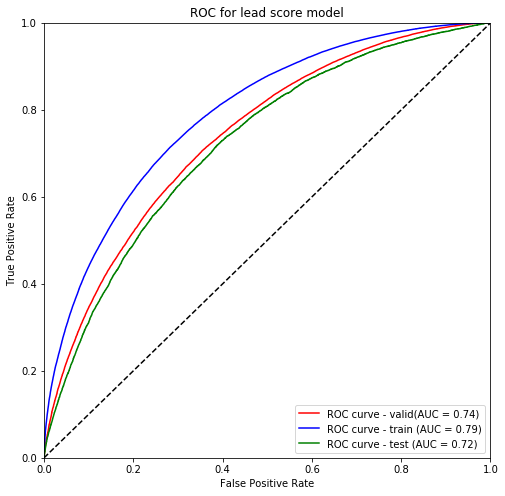

In [29]:
Loan_Modules.draw_ROC(gbm, dtrain, dvalid, dtest, y_train, y_valid, y_test)

The model is above the no skill line for most thresholds

# Model Tuning - using Bayesian Optimization

In [31]:
from bayes_opt import BayesianOptimization

train_x = df_train[feat]
train_y = df_train.loanstatus

xgtrain = xgb.DMatrix(train_x, label=train_y, missing = np.NAN)

def xgb_evaluate(eta,
                 max_depth,
                 min_child_weight,
                 colsample_bytree,
                 subsample,
                 gamma):
    params = dict()
    params['objective'] = 'binary:logistic'
    params['eta'] = eta
    params['max_depth'] = int(max_depth)   
    params['min_child_weight'] = int(min_child_weight)
    params['colsample_bytree'] = colsample_bytree
    params['subsample'] = subsample
    params['gamma'] = gamma
    params['verbose_eval'] = False

    cv_result = xgb.cv(params, xgtrain,
                       num_boost_round=10000,
                       nfold=3,
                       metrics={'auc'},
                       seed=1234,
                       callbacks=[xgb.callback.early_stop(50)])
    print(cv_result)

    return cv_result['test-auc-mean'].max()


xgb_BO = BayesianOptimization(xgb_evaluate, 
                             {'eta': (0.02, 0.4),
                              'max_depth': (4, 8),
                              'min_child_weight': (2, 8),
                              'colsample_bytree': (0.4, 0.8),
                              'subsample': (0.5, 1),
                              'gamma': (0, 1)
                             }
                            )

xgb_BO.maximize(init_points=5, n_iter=40)

|   iter    |  target   | colsam... |    eta    |   gamma   | max_depth | min_ch... | subsample |
-------------------------------------------------------------------------------------------------
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[171]	train-auc:0.761604+0.000199348	test-auc:0.736367+0.000722727

     train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0          0.690732       0.000379       0.690412      0.000759
1          0.698533       0.001041       0.697966      0.002277
2          0.707423       0.001504       0.706474      0.000394
3          0.711045       0.000689       0.710100      0.000919
4          0.714014       0.001163       0.712990      0.001008
5          0.715618       0.000887       0.714442      0.000938
6          0.717086       0.000737       0.715833      0.000753
7          0.718999       0.000577       0.717414      0.

Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[953]	train-auc:0.790132+0.000220322	test-auc:0.740376+0.00037918

     train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0          0.705009       0.000435       0.704086      0.000514
1          0.708025       0.001024       0.707122      0.000841
2          0.710910       0.000826       0.709670      0.000399
3          0.712012       0.000615       0.710528      0.000696
4          0.712720       0.000688       0.711173      0.000520
5          0.713544       0.000563       0.711813      0.001011
6          0.714163       0.000537       0.712449      0.000795
7          0.714599       0.000434       0.712814      0.000890
8          0.715013       0.000565       0.713248      0.000753
9          0.715516       0.000767       0.713663      0.000509
10         0.715844       0.000965       0.713890      0.00025

Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[110]	train-auc:0.795746+0.000744823	test-auc:0.735834+0.000564724

     train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0          0.714875       0.000736       0.709162      0.000437
1          0.719574       0.000908       0.713322      0.001464
2          0.723350       0.000979       0.716560      0.000977
3          0.725527       0.000644       0.718033      0.000951
4          0.726738       0.000496       0.719085      0.000958
5          0.728070       0.000328       0.719960      0.000956
6          0.729558       0.000578       0.720944      0.000932
7          0.731231       0.000591       0.721855      0.000755
8          0.733242       0.000468       0.723003      0.000376
9          0.734271       0.000386       0.723616      0.000352
10         0.735381       0.000444       0.724288      0.0005

Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[292]	train-auc:0.765267+0.000270312	test-auc:0.737425+0.000300134

     train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0          0.690601       0.000298       0.690303      0.000810
1          0.699083       0.000586       0.698448      0.000853
2          0.706689       0.002320       0.705681      0.001007
3          0.709470       0.001276       0.708449      0.000223
4          0.711345       0.001388       0.710229      0.000238
5          0.713259       0.002091       0.712025      0.000604
6          0.714925       0.001468       0.713706      0.000390
7          0.716100       0.001715       0.714749      0.000570
8          0.717891       0.001712       0.716436      0.000555
9          0.718624       0.001853       0.717079      0.000424
10         0.719960       0.001493       0.718178      0.0002

Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[1637]	train-auc:0.778682+0.000301586	test-auc:0.740232+0.000654799

      train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0           0.699364       0.000714       0.698723      0.000587
1           0.701581       0.000939       0.700854      0.001583
2           0.704732       0.001073       0.703834      0.001697
3           0.706012       0.000383       0.705146      0.001530
4           0.706335       0.000237       0.705471      0.001307
5           0.707516       0.000140       0.706659      0.001414
6           0.708462       0.000429       0.707602      0.001041
7           0.708738       0.000363       0.707793      0.001214
8           0.709418       0.000618       0.708425      0.000817
9           0.709947       0.000872       0.708892      0.000571
10          0.710051       0.001094       0.70890

Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.


KeyboardInterrupt: 

In [32]:
xgb_BO_scores_df = pd.DataFrame()
for i, res in enumerate(xgb_BO.res):
    xgb_BO_scores = pd.DataFrame(res['params'], index=[i])
    xgb_BO_scores['score'] = res['target']
    xgb_BO_scores_df = pd.concat([xgb_BO_scores_df, xgb_BO_scores], axis=0)

In [33]:
xgb_BO_scores_df = xgb_BO_scores_df.sort_values(by='score',ascending=False)
xgb_BO_scores_df.head(5)

,colsample_bytree,eta,gamma,max_depth,min_child_weight,subsample,score
2,0.731245,0.059986,0.263871,5.679162,6.190495,0.734674,0.740376
8,0.794370,0.049670,0.038887,4.157342,2.568966,0.553947,0.740232
9,0.780330,0.078022,0.024398,4.215459,7.473614,0.508926,0.739269
5,0.571612,0.137560,0.014177,4.018096,7.955476,0.703950,0.738570
3,0.410405,0.125586,0.079857,6.507961,5.037871,0.859359,0.738508


In [34]:
%%time
# parameter set 1
params = {'objective': 'binary:logistic'
                  , 'booster': 'gbtree'
                  , 'eta': 0.06
                  , 'colsample_bytree': 0.73
                  , 'gamma': 0.26
                  , 'max_depth': 6
                  , 'min_child_weight': 6
                  , 'subsample': 0.73
                  , 'seed': 1234
                  , 'nthread': -1
                  , 'silence': 1
                  , 'eval_metric': 'auc'
                  }

watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
num_boost_round=10000
gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist, early_stopping_rounds=50)

#[2848]	train-aucpr:0.466965 eval-aucpr:0.435129

[0]	train-auc:0.70667	eval-auc:0.704181
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 50 rounds.
[1]	train-auc:0.709505	eval-auc:0.706888
[2]	train-auc:0.714228	eval-auc:0.712016
[3]	train-auc:0.714931	eval-auc:0.712664
[4]	train-auc:0.716226	eval-auc:0.714068
[5]	train-auc:0.716479	eval-auc:0.714097
[6]	train-auc:0.717559	eval-auc:0.715084
[7]	train-auc:0.718075	eval-auc:0.715598
[8]	train-auc:0.719184	eval-auc:0.716738
[9]	train-auc:0.719958	eval-auc:0.717478
[10]	train-auc:0.720187	eval-auc:0.717622
[11]	train-auc:0.720721	eval-auc:0.718107
[12]	train-auc:0.720868	eval-auc:0.718248
[13]	train-auc:0.721195	eval-auc:0.718388
[14]	train-auc:0.721849	eval-auc:0.719067
[15]	train-auc:0.722382	eval-auc:0.719534
[16]	train-auc:0.723565	eval-auc:0.720456
[17]	train-auc:0.723698	eval-auc:0.720452
[18]	train-auc:0.723981	eval-auc:0.720763
[19]	train-auc:0.724265	eval-auc:0.721018
[20]	train-auc:0.724993	eval-a

[191]	train-auc:0.759579	eval-auc:0.73789
[192]	train-auc:0.75973	eval-auc:0.737919
[193]	train-auc:0.759841	eval-auc:0.737961
[194]	train-auc:0.7599	eval-auc:0.737988
[195]	train-auc:0.760069	eval-auc:0.738042
[196]	train-auc:0.760188	eval-auc:0.738078
[197]	train-auc:0.760341	eval-auc:0.738091
[198]	train-auc:0.760525	eval-auc:0.738133
[199]	train-auc:0.760665	eval-auc:0.73815
[200]	train-auc:0.76078	eval-auc:0.738181
[201]	train-auc:0.76091	eval-auc:0.738203
[202]	train-auc:0.761105	eval-auc:0.738234
[203]	train-auc:0.761167	eval-auc:0.738246
[204]	train-auc:0.761201	eval-auc:0.738247
[205]	train-auc:0.761352	eval-auc:0.738272
[206]	train-auc:0.761504	eval-auc:0.738311
[207]	train-auc:0.761616	eval-auc:0.738327
[208]	train-auc:0.761762	eval-auc:0.738361
[209]	train-auc:0.76183	eval-auc:0.738375
[210]	train-auc:0.761985	eval-auc:0.738397
[211]	train-auc:0.762093	eval-auc:0.738403
[212]	train-auc:0.762207	eval-auc:0.738416
[213]	train-auc:0.762338	eval-auc:0.738433
[214]	train-auc:0.7

[383]	train-auc:0.779155	eval-auc:0.740609
[384]	train-auc:0.779295	eval-auc:0.740632
[385]	train-auc:0.779441	eval-auc:0.740638
[386]	train-auc:0.779522	eval-auc:0.740644
[387]	train-auc:0.779597	eval-auc:0.740646
[388]	train-auc:0.779703	eval-auc:0.74065
[389]	train-auc:0.779738	eval-auc:0.740654
[390]	train-auc:0.779812	eval-auc:0.740644
[391]	train-auc:0.779846	eval-auc:0.74065
[392]	train-auc:0.779943	eval-auc:0.740638
[393]	train-auc:0.780027	eval-auc:0.740651
[394]	train-auc:0.780071	eval-auc:0.740648
[395]	train-auc:0.780185	eval-auc:0.740662
[396]	train-auc:0.780265	eval-auc:0.740662
[397]	train-auc:0.780425	eval-auc:0.740664
[398]	train-auc:0.780546	eval-auc:0.740678
[399]	train-auc:0.780641	eval-auc:0.740681
[400]	train-auc:0.780666	eval-auc:0.740685
[401]	train-auc:0.780821	eval-auc:0.740669
[402]	train-auc:0.780915	eval-auc:0.740656
[403]	train-auc:0.781035	eval-auc:0.740674
[404]	train-auc:0.781158	eval-auc:0.740701
[405]	train-auc:0.781187	eval-auc:0.740712
[406]	train-a

# Validate on test data

Area under the ROC curve - validation: 0.741066
Area under the ROC curve - train: 0.789230
Area under the ROC curve - test: 0.722921


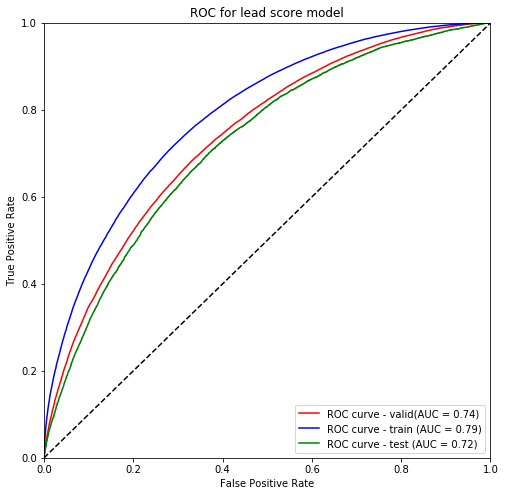

In [35]:
Loan_Modules.draw_ROC(gbm, dtrain, dvalid, dtest, y_train, y_valid, y_test)

In [36]:
y_pred = gbm.predict(dtest)
y_pred

array([0.6043036 , 0.5385303 , 0.3816656 , ..., 0.6347206 , 0.36528233,
       0.5183205 ], dtype=float32)

In [37]:
print('max predicted value: {:.2f} \nmin predicted value: {:.2f} \navg predicted value: {:.2f}'.format(y_pred.max(), y_pred.min(), y_pred.mean()))

max predicted value: 0.97 
min predicted value: 0.00 
avg predicted value: 0.44


In [38]:
predicted_value = [1 if pred > 0.5 else 0 for pred in y_pred]

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_value))

              precision    recall  f1-score   support

         0.0       0.92      0.64      0.75     50035
         1.0       0.26      0.69      0.38      9148

    accuracy                           0.65     59183
   macro avg       0.59      0.67      0.56     59183
weighted avg       0.82      0.65      0.69     59183



Model needs improvement on class 1 (low precision and recall)

In [41]:
importance = gbm.get_fscore()

In [42]:
df_importance = pd.DataFrame(importance.items(), columns=['feature', 'fscore'])
df_importance['fscore'] = df_importance['fscore'] / df_importance['fscore'].sum()

In [43]:
df_importance.sort_values(['fscore'], ascending=False, inplace=True)
df_importance

,feature,fscore
0,intrate,0.032369
1,emptitle_chargeoff_pct,0.031555
15,dti,0.031439
3,installment,0.028842
21,mosinoldrevtlop,0.024616
18,maxbalbc,0.022911
8,fundedamnt,0.022717
23,annualinc,0.022639
63,diff_crline_issue,0.022290
2,avgcurbal,0.021360


<Figure size 2304x2304 with 0 Axes>

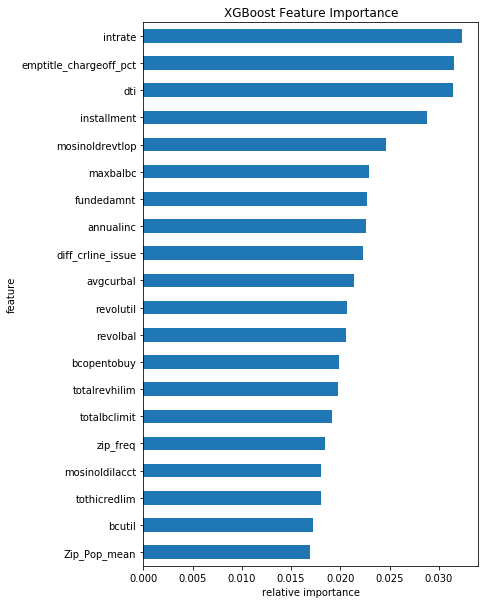

In [44]:
plt.figure(figsize=(32, 32))

df_importance[:20].sort_values(['fscore'], ascending=True).plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')
plt.gcf().savefig('feature_importance_xgb.png')

- **intrate:** interest rate on the loan 
- **emptitle_chargeoff_pct** avg. charged-off rate per emptitle 
- **dti:** debt-to-income ratio
- **installment:** the monthly payment owed by the borrower if the loan originates.
- **mosinoldrevtlop:** months since oldest revolving account opened
- **maxbalbc:** maximum current balance owed on all revolving accounts
- **fundedamount:** the total amount funded by investors for that loan at that point in time.
- **annualinc** annual income
- **diff_crline_issue:** days between issued date and earliest credit line
- **avgcurbal:** average current balance of all accounts
- **revolutil:** the amount of credit the borrower is using relative to all available revolving credit
- **revolbal:** revolving balance
- **bcopentobuy:** total open to buy on revolving bankcards
- **totalrevhilim:** total revolving high credit/credit limit
- **totalbclimit:** total bankcard high credit/credit limit
- **zip_freq:** frequency of zipcode appearance
- **mosinoldilacct:** months since oldest installment account opened
- **tothicredlim:** total high credit/credit limit
- **ilutil:** total current balance to high credit/credit limit on all install acct
- **bcutil:** ratio of total current balance to high credit/credit limit for all bankcard accounts.
- **zip_pop_mean:** average population per zip code

# Predict

In [45]:
dpred = xgb.DMatrix(df_pred[feat])

In [46]:
predictions = gbm.predict(data=dpred)

In [47]:
pred_converted = []
for pred in predictions:
    pred_converted.append(1 if pred > 0.5 else 0)

**39% of loans is charged off vs fully paid, which is higher than historical average (25%). However, not this is not entirely unreasonable considering the economic uncertainty in 2020**

In [48]:
chargeOff_rate = float(sum(pred_converted)/len(pred_converted))
print ('The predicted charged off rate for the current loans: {:.2f}'.format(chargeOff_rate))

The predicted charged off rate for the current loans: 0.39


# Save Model

In [50]:
import pickle

In [51]:
with open('model_balanced.pkl','wb') as pkl_file:
    pickle.dump(gbm, pkl_file)

In [52]:
from sklearn.externals import joblib
joblib.dump(gbm, "pima_balanced.joblib.dat")

/home/yingjie/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['pima.joblib.dat']